In [3]:
import networkx as nx
from statsmodels.distributions.empirical_distribution import ECDF
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

In [4]:
g = nx.DiGraph()
g.add_edges_from([(1,2),
                 (1,3),
                 #(1,4),
                 (5,1),
                 (1,6),
                 (2,5),
                 (5,4),
                 (3,5),

                 (3,4),
                 (7,3),
                 (2,6),
                 (4,7),
                 (5,6),
                 (5,7),
                 (6,7),
                 (6,8),
                  #(6,11),(6,12),
                 (7,8),
                  (8,9),(9,10),(10,11),(12,10),(10,13),(10,14),(10,15),(15,12)
                 ])



In [6]:
def draw_network_colored(g, p, centrality):
    plt.figure(figsize = (20,10))
    nx.draw_networkx(g,
                     pos=p,

                     font_size = 12,
                     font_weight = 'bold',
                     font_color = 'plum',
                     edge_color = 'grey'
                    )

    nodes = nx.draw_networkx_nodes(g, p,cmap=plt.get_cmap('Blues') ,node_color=[c for c in centrality.values()],
                     node_size = 300,
                     )
    nodes.set_edgecolor('lightgrey')
    plt.axis('off')
    plt.show()




DiGraph with 15 nodes and 24 edges


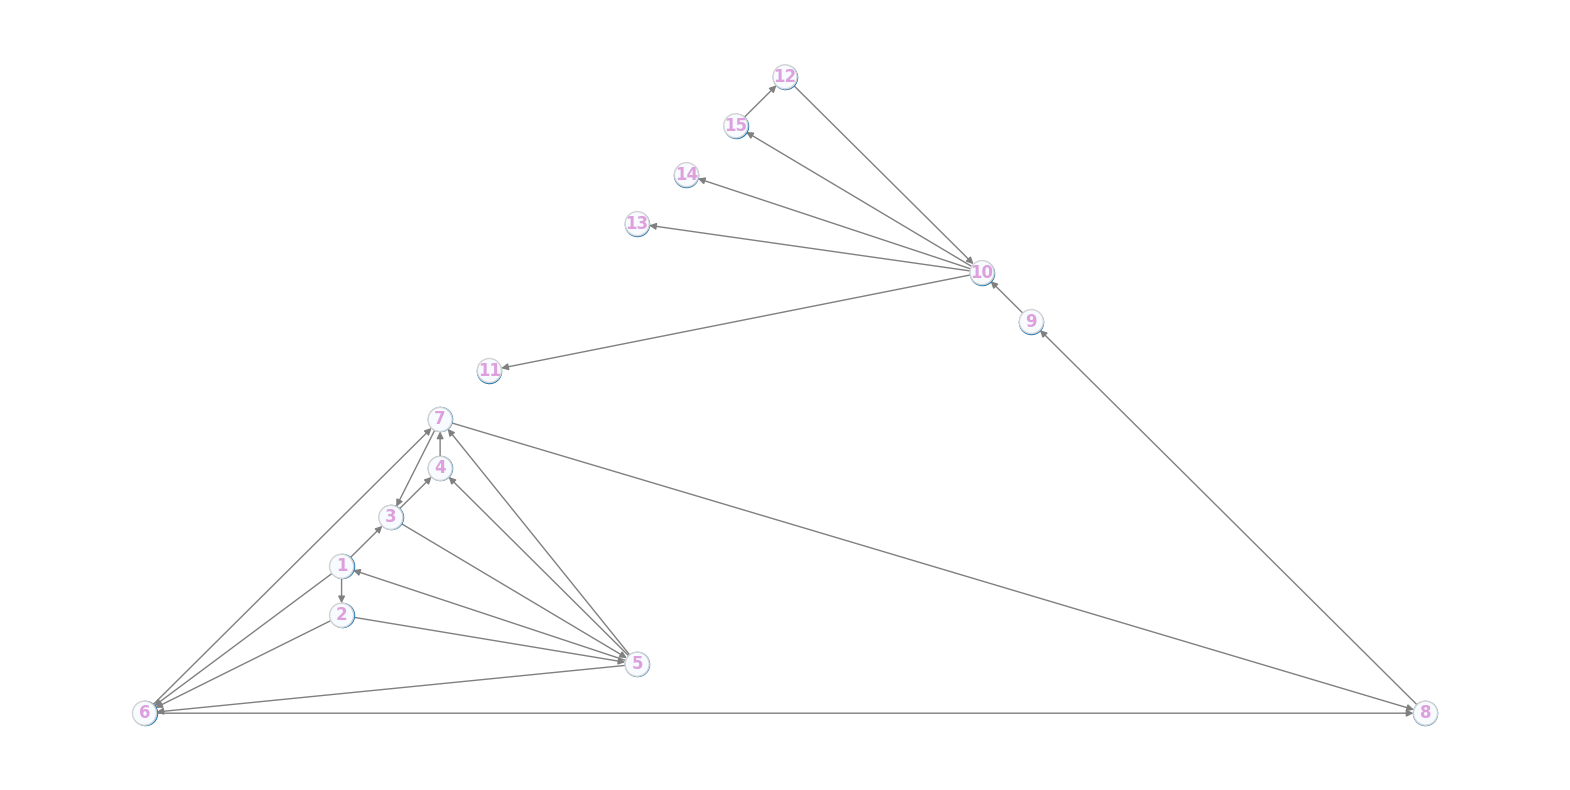

In [7]:
print(g)
posizione = nx.planar_layout(g)
draw_network_colored(g, posizione, {i:0 for i in g.nodes()})

In [8]:
print(nx.is_weakly_connected(g))
print(nx.number_weakly_connected_components(g))
largest_cc = max(nx.weakly_connected_components(g), key=len)
print(largest_cc)

True
1
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}


### Esercizio

- Scaricare i dati da https://networkrepository.com/email-dnc-corecipient.php
- Costruire un grafo diretto
- Rispondere alle domande:
    - Il grafo è debolmente connesso?
    - Quante componenti (strong) ci sono?
    - Che percentuale di nodi include la prima componente?
    - Quante componenti servono per coprire il 70% dei nodi?
    - Quante componenti (strong) con solo un nodo ci sono?
    - Possono esserci componenti weak con un solo nodo in Ge? Ci sono?



In [10]:
edge_list = [
    (r.split()[0], r.split()[1])
    for r in open("../data/emails/email-dnc-corecipient.edges")
]

G = nx.from_edgelist(
    edgelist=edge_list,
    create_using=nx.DiGraph(),
)

G.size(), G.order()

(12085, 906)

In [11]:
nx.is_weakly_connected(G)

False

In [22]:
strong_components = list(nx.strongly_connected_components(G))

count_cc = nx.number_strongly_connected_components(G)

count_cc

501

In [24]:
largest_cc = max(strong_components, key=len)

len(largest_cc)/count_cc

0.7924151696606786

In [25]:
len([
    c
    for c in strong_components
    if len(c) == 1
])

494

In [27]:
weak_components = list(nx.weakly_connected_components(G))

len([
    c
    for c in weak_components
    if len(c) == 1
]) # Se ci fossero Weak Components con dimensione 1 sarebbero dei Nodi Isolati

0